In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

MAXIMUM_DT = 20.0

def transform_log_to_sequence_example(logfile, dimension):
    data_names = ['x'+str(i) for i in range(dimension-1)]
    column_names = ['date', 'source'] + data_names
    perf_df = pd.read_csv(logfile,
                          header=None, parse_dates=True,
                          index_col=0, names=column_names)
    #  Filter out RNN lines, just keep 'interface'
    if "rnnbox" in logfile:
        print("Old RNNbox file, dividing by 255")
        perf_df.x0 /= 255
    perf_df = perf_df[perf_df.source == 'interface']
    #  Process times.
    perf_df['t'] = perf_df.index
    perf_df.t = perf_df.t.diff()
    perf_df.t = perf_df.t.dt.total_seconds()
    perf_df = perf_df.dropna()
    perf_df.at[perf_df[perf_df.t > MAXIMUM_DT].index, 't'] = MAXIMUM_DT
    print(perf_df.describe())
    return np.array(perf_df[['t']+data_names])

def plot_log_output(output_df, name="unknown", colour='b'):
    """Plot the data in output_df assuming it has columns x and time"""
    sns.set_style('whitegrid')
    sns.set_context('paper')
    f, ax = plt.subplots(figsize=(8, 2))
    sns.lineplot(x='time', y='x', data=output_df, ax=ax, legend=False, color=colour)
    ax.set_xlabel("seconds")
    ax.set_ylabel("position")
    ax.set(ylim=(-0.1, 1.1))
    sns.despine(f, left=True, bottom=True)
    ax.get_figure().savefig('../images/'+name+'_output.pdf', dpi=300, bbox_inches="tight")
    ax.get_figure().savefig('../images/'+name+'_output.png', dpi=300, bbox_inches="tight")

,x,time
count,15474.000000,15474.000000
mean,0.475421,332.839973
std,0.260138,170.435987
min,0.007874,0.032405
25%,0.259843,187.045057
50%,0.480315,346.484587
75%,0.685039,481.448511
max,1.000000,605.270963


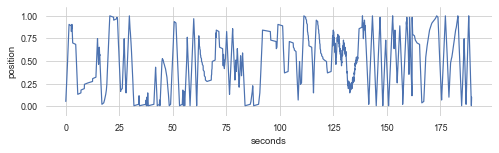

In [48]:
logfile = "2019-09-23T01-52-53-2d-mdrnn.log"
column_names = ['date', 'source', 'x']
perf_df = pd.read_csv(logfile,
                      header=None, parse_dates=True,
                      index_col=0, names=column_names)
perf_df = perf_df[perf_df.source == 'interface']
perf_df['time'] = perf_df.index
perf_df.time = perf_df.time.diff()
perf_df.time = perf_df.time.dt.total_seconds()
perf_df.time = perf_df.time.cumsum()
perf_df = perf_df.dropna()
display(perf_df.describe())
        
starting_point = 0
df = perf_df[starting_point:starting_point+4000]
plot_log_output(df, name="human_data", colour=sns.color_palette('deep')[0])